# SENTIMENT ANALAYSIS BASED ON TWITTER DATA

## This project is for the purpose of analyzing the sentiment of Nigerian twitter users about one of the top Nigerian presidential candidates "Peter Obi".

## Twitter API calls where made to be able to access this data.

In [1]:
#importing dependencies
import tweepy as tw
import numpy as np
import pandas as pd
from tweepy import OAuthHandler
import json
import time
from textblob import TextBlob
import re
from dotenv import load_dotenv
from pathlib import Path
import os
import plotly.express as px
import nbformat
from wordcloud import WordCloud
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', 150)

In [2]:
dotenv_path = Path("C:\\Users\\HP\\webscrapping\\scrapper\\.gitignore\\.env")
load_dotenv(dotenv_path=dotenv_path)

True

In [3]:
#Authentication process
auth2 = tw.OAuth2AppHandler(os.getenv('api_key'), os.getenv('api_key_secret'))
api2 = tw.API(auth2)

In [4]:
#Scraping tweets through API call
status =  tw.Cursor(api2.search_tweets, "Peter Obi -is:retweet", result_type = "mixed", tweet_mode = "extended", lang = 'en').items(5000)
data_list = [[statuses.user.id, statuses.user.name, statuses.user.location, statuses.full_text] for statuses in status]
time.sleep(15)


In [18]:
#creating a dataframe for the uncleaned data
tweet_data = pd.DataFrame(data_list, columns=['id', 'username', 'location', 'tweet'])

In [19]:
#saving the datafrae as a csv file in local storage
tweet_data.to_csv('tweet.csv', index=False)

## Data wrangling

In [20]:
def tweet_processor(tweets):
    '''This function cleans each tweet of characters and features that constitute noise to its 
    quality'''
    tweet = tweets
    #lower case
    tweet = tweet.lower()
    #Removing unicode strings like "\u002c" and "x96"
    tweet = re.sub(r"(\\u[0-9A-Fa-f]+)", '', tweet)
    tweet = re.sub(r"[^\x00-\x7f]", '', tweet)
    #converting any url to "URL"
    tweet = re.sub("((www\.[^\s]+)|(https?://[^\s]+))", "", tweet)
    #converting @username to "AT_USER"
    tweet = re.sub("@[^\s]+", '', tweet)
    #removing other whitespaces
    tweet = re.sub("[\s]", " ", tweet)
    tweet = re.sub("[\n]+", " ", tweet)
    #removing RT
    tweet = re.sub(r"rt[\s]+", '', tweet)
    #removing not alphanumeric symbols white spaces
    tweet = re.sub(r"[^\w]", " ", tweet)
    #Removing hashtag
    tweet = re.sub(r"#([^\s]+)", '', tweet)
    #replace #word with word
    tweet = re.sub(r"#([^\s]+)", '', tweet)
    #removing :( or :)
    tweet = tweet.replace(':)', '')
    tweet = tweet.replace(":(", '')
    #removing numbers
    tweet = ''.join([i for i in tweet if not i.isdigit()])
    #removing multiple exclamation
    tweet = re.sub(r"(\!)\1+", " ", tweet)
    tweet = re.sub(r"(\?)\1=", " ", tweet)
    #removing multiple question marks
    tweet = re.sub(r"(\?)\1+", " ", tweet)
    #removing multistop
    tweet = re.sub(r"(\.)\1+", " ", tweet)
    #trim
    tweet = tweet.strip('\'"')
    #stemming
    #st = PorterStemmer()
    #tweet = " ".join([st.stem(word) for word in tweet.split() if not word in stop_words])
    #removing emoticons from text
    tweet = re.sub(":\)|;\)|\(-:|:-D|=D|:P|xD|x-p|\^\^|:-*|\^\.\^|\^\-\^|\,-\)|\)-:|:\'\(|:\(|:-\(|:\S|T\.T|\.\_\.|:<|:-\S|:-<|\*\-\*|:0|=0|=\-0|0\.o|X0|0\_0|:-\@|=/|:/|X\-\(|>\.<|>=\(|D:", '', tweet)

    return tweet

In [21]:
tweet_data['tweet'] = tweet_data.tweet.apply(tweet_processor)

In [22]:
tweet_data.head(10)

,id,username,location,tweet
0,44599458,Noble Igwe,"Lagos, Nigeria",please talk to me like a child why are people fact checking peter obi talking about his interview but not saying anything about the security situ...
1,1087778780,ARISE NEWS,"Lagos, London, NYC",we cannot spend bn on subsidy and less than half on education amp health peter obi labour party s presidential candidate peter obi maintain...
2,177139537,Charly Boy Area Fada 1,"Abuja, Nigeria",i watched peter obi today i just dey imagine for my mind if other presidential candidates dey also watch the same thing this man na proper goo...
3,1190266149973450752,Omo_iya_Fiyin😌💕,,i watched peter obi today i just dey imagine for my mind if other presidential candidates dey also watch the same thing
4,267652082,Duziem Ugoji,,here are two facts agbado united cannot refute if tinubu built lagos he built the second worst liveable city in the wor
5,765743839,Name Cannot Be Blank,,we can all see why peter obi took his sweet time in finding a vp and when he did it was a match made in heaven who w
6,434552417,Elisha,,imagine that tinubu loses this presidential election to peter obi and ambode beats sanwo olu to emerge governor of lagos
7,228226679,Sandoka Foods Nigeria,Nigeria.,peter obi x dr yusuf datti ahmed are both economists with these two men the dream to move nigeria from consumption to prod
8,1708471465,Clinton maduakor,"Lagos, Nigeria",who sees road and enters bush or mud nigerians suffer no dey tire una if you are tire of suffering please let s here you
9,1276470188288946177,Deji,"Lagos, Nigeria",peter obi x yusuf datti baba ahmed how do they look dont you like the confidence amp awesomeness oozing from both nige


In [40]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
#sentimment function
def sentiment_score(text):
    analyzer = SentimentIntensityAnalyzer()
    sent = []
    for row in text:
        score = analyzer.polarity_scores(row)
        sent.append(score)
    return sent

In [41]:
sentiment_values = sentiment_score(tweet_data.tweet)

In [42]:
df_sentiment = pd.DataFrame(sentiment_values)

In [43]:
df_sentiment

,neg,neu,pos,compound
0,0.000,0.806,0.194,0.6705
1,0.076,0.816,0.108,0.1531
2,0.098,0.858,0.044,-0.4784
3,0.000,1.000,0.000,0.0000
4,0.152,0.743,0.104,-0.3182
...,...,...,...,...
4995,0.000,0.901,0.099,0.3182
4996,0.129,0.871,0.000,-0.5499
4997,0.000,0.857,0.143,0.3612
4998,0.000,0.893,0.107,0.3400


In [44]:
#merging df_sentiment to tweet_data
tweet_data_new = pd.concat([tweet_data.reset_index(drop=True), df_sentiment], axis = 1)

In [46]:
# function for sentiment assignment
def assigner(value):
    if value > 0:
        return 'Positive'
    elif value == 0:
        return 'Neutral'
    else:
        return 'Negative'


In [47]:
tweet_data_new["Sentiment"] = tweet_data_new.compound.apply(assigner)

In [48]:
sentiment_count = tweet_data_new.Sentiment.value_counts()
sentiment_name = tweet_data_new.Sentiment.unique()

In [49]:
fig = px.pie(tweet_data_new.Sentiment, names = sentiment_name, values = sentiment_count, title = "Sentiment Distribution",hole = 0.5,)
fig.show()

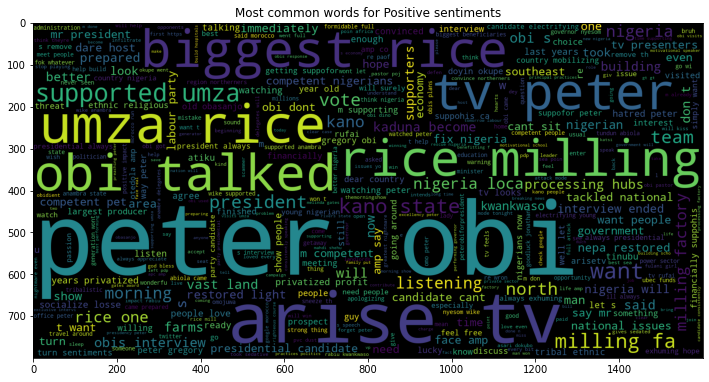

In [54]:
plt.figure(figsize=(12,15))
wcl  = WordCloud(max_words=2000,min_font_size=10, height=800, width=1600, background_color="black",).generate(
    " ".join(tweet_data[tweet_data_new["Sentiment"]=="Positive"].tweet))
plt.title('Most common words for Positive sentiments')
plt.imshow(wcl)

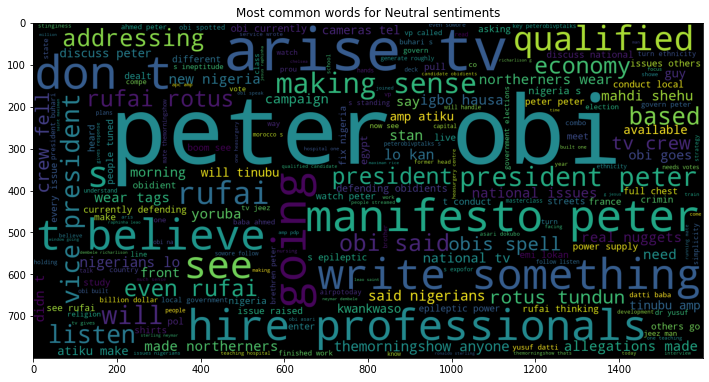

In [55]:
plt.figure(figsize=(12,15))
wcl  = WordCloud(max_words=2000,min_font_size=10, height=800, width=1600, background_color="black").generate(
    " ".join(tweet_data[tweet_data_new["Sentiment"]=="Neutral"].tweet))
plt.title('Most common words for Neutral sentiments')
plt.imshow(wcl)

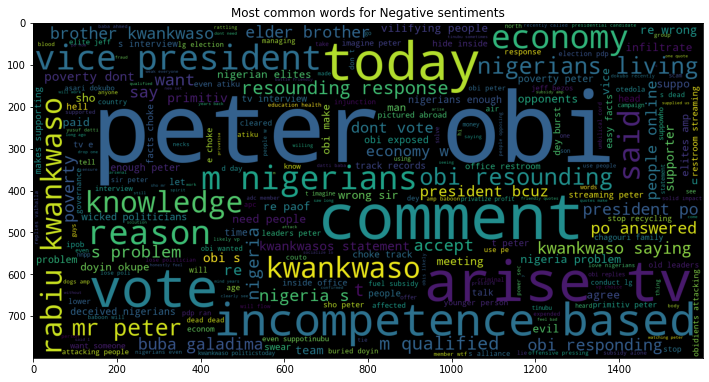

In [56]:
plt.figure(figsize=(12,15))
wcl  = WordCloud(max_words=2000,min_font_size=10, height=800, width=1600, background_color="black").generate(
    " ".join(tweet_data[tweet_data_new["Sentiment"]=="Negative"].tweet))
plt.title('Most common words for Negative sentiments')
plt.imshow(wcl)